In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tabulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 62.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 38.2 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 51.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 33.5 MB/s eta 0:00:0000:0100:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=816311d24a850b339d38c8a37d86b24479101240991b242e6d328a28378e7a1c
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 66.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import zipfile
import os
import gc
gc.collect()

0

In [3]:
 hpg_reserve = pd.read_csv('hpg_reserve.csv.zip',compression='zip')

In [4]:
def Assining_Variables():
    fle1 = "air_visit_data.csv"
    fle2 = "air_reserve.csv"
    fle3 = "air_store_info.csv"
    fle4 = "date_info.csv"
    fle5 = "store_id_relation.csv"
    fle6 = hpg_reserve
    fle7 = "hpg_store_info.csv"
    fnl_flle = "bk.csv"
    start_dt = date(2022, 4, 23)
    end_dt = date(2712,7, 22)
    llll= []
    return fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle

In [5]:
def load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7):
    df_air_visit_data = pd.read_csv(fle1)
    df_air_reserve = pd.read_csv(fle2)
    df_air_store_info = pd.read_csv(fle3)
    df_date_info = pd.read_csv(fle4)
    df_store_id_relation = pd.read_csv(fle5)
    df_hpg_reserve = fle6
    df_hpg_store_info = pd.read_csv(fle7)   
    return df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info

In [6]:
 def Counting_NAN_Values(dfff):
        df_nan = pd.DataFrame(columns=['Nan count'])
        nan_col = list(dfff.columns.tolist())
        total_nan = 0
        for col in nan_col:
            nan_cnt = dfff[col].isnull().sum()
            df_nan.loc[col] = nan_cnt
            total_nan += nan_cnt
        print(tabulate(df_nan, headers = 'keys', tablefmt = 'psql'))
        return df_nan['Nan count']

In [7]:
def Dataset_Cleaning(dff):
        dfff = dff.isna().sum().sum()
        print("Total NAN values are : {0}".format(dfff))
        dff_nan = dff[pd.isnull(dff).any(axis=1)]
        print("Data with at least 1 NAN values: {0}".format(len(dff_nan.index)))
        df_nan_all = dff[pd.isnull(dff).all(1)]
        print("Rows filled NAN data: {0}".format(len(df_nan_all.index)))
        df_air_store = dff.air_store_id.isnull().sum()
        df_hpg_store = dff.hpg_store_id.isnull().sum()
        print("Count of NAN values on air_store_id are: {0}".format(df_air_store))
        print("Count of NAN values on hpg_store_id are: {0}".format(df_hpg_store))
        nan_ids_df = dff[dff.air_store_id.isnull() & dff.hpg_store_id.isnull()]
        len_invalid_id = len(nan_ids_df.index)
        print("Number of Invalid IDs (both air_store_id & hpg_store_id) are : {0}".format(len_invalid_id))
        df_nadn = Counting_NAN_Values(dff)
        
        """"dff['calendar_date'] = dff['calendar_date'].replace(np.nan, -1)
        dff['day_of_week'] = dff['day_of_week'].replace(np.nan, -1)
        dff['holiday_flg'] = dff['holiday_flg'].replace(np.nan, -1)
        dff['hpg_store_id'] = dff['hpg_store_id'].replace(np.nan, -1)
        #dff.drop(['calendar_date','day_of_week','holiday_flg','hpg_store_id'],axis=1,inplace=True)
        le = LabelEncoder()
        dff[['genre_name', 'area_name']] = dff[['genre_name', 'area_name']].apply(le.fit_transform)"""
        
        #Replacing NAN values of air_store_id,visit_datetime,reserve_datetime,visitors,reserve_visitors, with appropriate constant values
        """"dff[['visit_datetime','reserve_datetime']] = dff[['visit_datetime','reserve_datetime']].replace(np.nan,'9999 00:00:00.000')
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].replace(np.nan,0.0)
        dff['visit_date'] = dff['visit_date'].replace(np.nan,9999)
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].astype(int)
        dff[['air_store_id']] = dff[['air_store_id']].replace(np.nan,'air_ba937bf13d40fc25')
        #dff[['visit_datetime','reserve_datetime']] = pd.to_datetime(dff[['visit_datetime','reserve_datetime','visit_date']].astype(str),format='%Y-%m-%d')
        df_nadn = Counting_NAN_Values(dff)"""
        #dff.drop(['genre_name','area_name'],axis=1)
        #print(dff)
        return dfff,df_nadn

In [8]:
def Nan_Percent_Computation(dffff):
        nan_values_cnt,df_nafn = Dataset_Cleaning(dffff)
        total_values_cnt = dffff.shape[0]*dffff.shape[1]
        print("Total Values' Counts are : {0}".format(total_values_cnt))
        total_correct_values_cnt = (total_values_cnt - nan_values_cnt)
        print("Total Correct Values' Counts are : {0}".format(total_correct_values_cnt))
        return total_correct_values_cnt,nan_values_cnt,df_nafn

In [9]:
def Pie_Chart_NAN_Column_Plotting(dft_val1,dfg,total_crt_value_cnt,nan_value_cnt):
    dft = pd.DataFrame({'Data': ['Correct Values', 'NAN Values'],
                          'ValueCount': [total_crt_value_cnt,nan_value_cnt]})
        # Plotting the pie chart for above dataframe
    #dft.groupby(['Data']).sum().plot(kind='pie', y='Value Count', autopct='%1.0f%%')
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    #sizes = [215, 130,215, 130,215, 130]
    color = ['lightcoral', 'lightskyblue']
    explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sdd, explode=explode1, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
   
    # Define the ratio of gap of each fragment in a tuple
    #explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05)
    # DataFrame of each student and the votes they get df_nan_disp['Data Name'],df_nan_disp['NAN Count for each Column']
    #dft = pd.DataFrame({'Data Name': dfg.columns,'NAN Count for each Column':dft_val1})
    # Plotting the pie chart for above dataframe
    # Data to plot
    #labels = dfg.columns.values
    #sddd = dft_val1.values
    #sizes = [215, 130,215, 130,215, 130,215, 130,215, 130,215, 130,215, 130]
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    #explode = (0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0)  # explode 1st slice
    # Plot
    #plt.pie(sddd, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
    #plt.axis('equal')
    #plt.show()

In [10]:
def Final_Dataset():
        fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle = Assining_Variables()
        df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7)
        #df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = self.load_dataset()
        h1,t1 = os.path.split(fle1)
        h2,t2 = os.path.split(fle2)
        h3,t3 = os.path.split(fle3)
        h4,t4 = os.path.split(fle4)
        h5,t5 = os.path.split(fle5)
        #h6,t6 = os.path.split(fle6)
        h7,t7 = os.path.split(fle7)
        print("The shape of {0} is {1}".format(t1,df_air_visit_data.shape),end="\n")
        print("The shape of {0} is {1}".format(t2,df_air_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t3,df_air_store_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t4,df_date_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t5,df_store_id_relation.shape),end="\n")
        print("The shape of hpg_rserve file is {0}".format(df_hpg_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t7,df_hpg_store_info.shape),end="\n")
        
        df_n = pd.concat([df_air_visit_data[['air_store_id','visit_date','visitors']],df_air_reserve], axis=0, join="outer")
        df_nn = pd.merge(df_n,df_air_store_info,on='air_store_id',how="left")
        df_nn = df_nn.rename(columns = {'air_genre_name':'genre_name','air_area_name':'area_name'})
        hpg_n = pd.merge(df_hpg_store_info,df_hpg_reserve,on='hpg_store_id',how="left")
        #hpg_n = pd.concat([df_hpg_store_info,df_hpg_reserve,], axis=0, join="outer")
        hpg_n = hpg_n.rename(columns = {'hpg_genre_name':'genre_name','hpg_area_name':'area_name'})
        hpg_nn = pd.merge(hpg_n,df_store_id_relation,on='hpg_store_id',how="left")
        hpg_date = pd.concat([hpg_nn,df_date_info,], axis=0, join="outer")
        df = pd.concat([df_nn,hpg_date], axis=0, join="outer")
        #hpg_date = [hpg_nn,df_date_info]
        #df_date = pd.concat(hpg_date,axis=1)
        #df_nnnn = [df_nn,df_date]
        #df = pd.concat(df_nnnn,axis=0)
        print(df)
        
 
        #Merging
        """df_n = pd.merge(df_air_visit_data[['air_store_id','visit_date','visitors']],df_air_reserve,how="outer")      
        df_nn = pd.merge(df_n,df_air_store_info,on='air_store_id',how="left")
        df_nn = df_nn.rename(columns = {'air_genre_name':'genre_name','air_area_name':'area_name'})
        hpg_n = pd.merge(df_hpg_store_info,df_hpg_reserve,on='hpg_store_id',how="left")
        hpg_n = hpg_n.rename(columns = {'hpg_genre_name':'genre_name','hpg_area_name':'area_name'})
        hpg_nn = pd.merge(hpg_n,df_store_id_relation,on='hpg_store_id',how="left")
        hpg_date = [hpg_nn,df_date_info]
        df_date = pd.concat(hpg_date,axis=1)
        df_nnnn = [df_nn,df_date]
        df = pd.concat(df_nnnn,axis=0)
        print(df)"""
        
        total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)
        #Pie_Chart_Plotting(total_crt_value_cnt,nan_value_cnt)
        df_nan_disp = pd.DataFrame()
        Pie_Chart_NAN_Column_Plotting(df_najn,df,total_crt_value_cnt,nan_value_cnt)
        
        #Printing the number of NANs in each column
        n_rows = len(df)
        for i in range(0,len(df_najn)):
            nan_percent_in_each_col = ((df_najn/n_rows)*100)
            df_nan_disp = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col})
        print(tabulate(df_nan_disp, headers = 'keys', tablefmt = 'psql'))
            
        df.drop(['calendar_date','day_of_week','holiday_flg'],axis=1,inplace=True)
        df[['visit_date','visitors','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id']] = df[['visit_date','visitors','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id']].replace(np.nan,9999)
        #df[['latitude','longitude','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id','hpg_area_name','hpg_genre_name']] = df[['latitude','longitude','visit_datetime','reserve_datetime','reserve_visitors','hpg_store_id','hpg_area_name','hpg_genre_name']].replace(np.nan,9999)
        df[['area_name','latitude','longitude','genre_name']] = df[['area_name','latitude','longitude','genre_name']].replace(np.nan,9999)
        df.drop(df.index[df['latitude'] == 9999], inplace=True)
        df.drop(df.index[df['longitude'] == 9999], inplace=True)
        #df.drop(df.index[df['visit_datetime'] == 9999], inplace=True)
        #df.drop(df.index[df['reserve_datetime'] == 9999], inplace=True)
        #df.drop(df.index[df['reserve_visitors'] == 9999], inplace=True)
        #df.drop(df.index[df['hpg_store_id'] == 9999], inplace=True)
        df['air_store_id'] = df['air_store_id'].replace(np.nan,9999)
        df.drop(df.index[df['air_store_id'] == 9999], inplace=True)
        df.drop(df.index[df['area_name'] == 9999], inplace=True)
        df.drop(df.index[df['genre_name'] == 9999], inplace=True)
        #df[['visitors']] = df[['visitors']].astype(int)
        #df.reset_index()"""
        #print(df)
        df_nadjn = Counting_NAN_Values(df)
        print(df)
        #print(df[['air_store_id','visit_date','visitors']])
        return df,fnl_flle

        #df = df[df['air_store_id'] != 9999]
        #df.drop(['air_store_id'],axis=0,inplace=True)
        
        #dff = self.Merge_dataframe(dff)
        
        #print(len(dff[['air_store_id','visit_date','visitors']]))

In [11]:
def Merge_dataframe(df):    
    df = df.assign(air_store_id_train = df[['air_store_id','visit_date']].apply(lambda row: '_'.join([str(each) for each in row]),axis=1))
    xt = pd.factorize(df['air_store_id_train'])[0]
    X_train = pd.DataFrame(xt)
    #X_train = X_train.head(252108)
    y_train = df['visitors'].astype(int)
    #y_train = y_train.head(252108)
    for dt in daterange():
        lll.append(dt.strftime("%Y-%m-%d"))
    df['New_visit_date'] = pd.DataFrame({'New_visit_date':lll})
    #df['New_visit_date'] = lll
    df = df.assign(air_store_id_test = df[['air_store_id','New_visit_date']].apply(lambda row: '_'.join([str(each) for each in row]),axis=1))
    xtt= pd.factorize(df['air_store_id_test'])[0]
    X_test = pd.DataFrame(xtt)
    #le = LabelEncoder()
    #X_test = X_test.apply(le.fit_transform)
    #X_test = X_test.head(252108)
    return X_train,y_train,X_test

In [12]:
dt1 = date(2022, 4, 23)
dt2 = date(2712,7, 22)
lll = []
def daterange():
    for n in range(int ((dt2 - dt1).days)+1):
        yield dt1 + timedelta(n)

The shape of air_visit_data.csv is (252108, 3)
The shape of air_reserve.csv is (92378, 4)
The shape of air_store_info.csv is (829, 5)
The shape of date_info.csv is (517, 3)
The shape of store_id_relation.csv is (150, 2)
The shape of hpg_rserve file is (2000320, 4)
The shape of hpg_store_info.csv is (4690, 5)
             air_store_id  visit_date  visitors visit_datetime  \
0    air_ba937bf13d40fb24  13-01-2016      25.0            NaN   
1    air_ba937bf13d40fb24  14-01-2016      32.0            NaN   
2    air_ba937bf13d40fb24  15-01-2016      29.0            NaN   
3    air_ba937bf13d40fb24  16-01-2016      22.0            NaN   
4    air_ba937bf13d40fb24  18-01-2016       6.0            NaN   
..                    ...         ...       ...            ...   
512                   NaN         NaN       NaN            NaN   
513                   NaN         NaN       NaN            NaN   
514                   NaN         NaN       NaN            NaN   
515                   NaN     

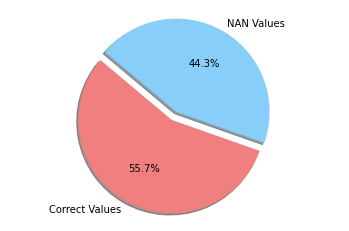

+------------------+------------------+
|                  |   % of NAN Count |
|------------------+------------------|
| air_store_id     |       70.5656    |
| visit_date       |       79.2727    |
| visitors         |       79.2727    |
| visit_datetime   |       20.7698    |
| reserve_datetime |       20.7698    |
| reserve_visitors |       20.7698    |
| genre_name       |        0.0425056 |
| area_name        |        0.0425056 |
| latitude         |        0.0425056 |
| longitude        |        0.0425056 |
| hpg_store_id     |       28.3647    |
| calendar_date    |       99.9575    |
| day_of_week      |       99.9575    |
| holiday_flg      |       99.9575    |
+------------------+------------------+
+------------------+-------------+
|                  |   Nan count |
|------------------+-------------|
| air_store_id     |           0 |
| visit_date       |           0 |
| visitors         |           0 |
| visit_datetime   |           0 |
| reserve_datetime |           0 |


In [13]:
df,fnl_flle = Final_Dataset()

In [14]:
X_train,y_train,X_test = Merge_dataframe(df)

In [15]:
def Classification_Model():
    clf = RandomForestClassifier(n_estimators = 2, random_state = 42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    #dd = df_train['visitors'].head(32019)
    print ('Accuracy:', accuracy_score(y_train, y_pred)*100)
    print ('F1 score:', f1_score(y_train, y_pred, average="weighted"))
    print ('Recall:', recall_score(y_train, y_pred, average="weighted"))
    print ('Precision:', precision_score(y_train, y_pred, average="weighted"))
    return y_pred,clf

In [16]:
y_pred,clf = Classification_Model()

Predicted values:
[   8    8   19 ... 9999 9999 9999]
Accuracy: 93.77573645866329
F1 score: 0.9364586773052862
Recall: 0.9377573645866328
Precision: 0.9395017192169043


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

In [18]:
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

In [19]:
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [20]:
!pip install mlxtend
from mlxtend.evaluate import bias_variance_decomp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.3 MB/s eta 0:00:00:00:010:01


In [21]:
from sklearn import metrics
mse, bias, var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_pred, loss='mse', num_rounds=100)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(X_test,y_pred))

MSE from bias_variance lib [avg expected loss]: 923.982
Avg Bias: 121.080
Avg Variance: 802.902
Mean Square error by Sckit-learn lib: 30071766.022


In [22]:
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_pred, clf)
#variance
var = np.var(y_pred)
SSE = np.mean((np.mean(y_pred) - y_train)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.

Bias = SSE - var
print("Training Error:",train_error)
print("Test Error:",test_error)
print("Variance:",var)
print("Bias:",Bias)

Training Error: 18.14470488860733
Test Error: 0.0
Variance: 14158580.67235405
Bias: -9524.777053155005


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import validation_curve

x_score = clf.predict_proba(X_test)[:,1]
#fpr, tpr, threshold = roc_curve
(y_train, x_score)
y_train = y_train.astype(float)
xtth = pd.DataFrame(x_score)
n_est = [1,5,10,15,20]

In [24]:
#y_train
fpr, tpr, threshold = roc_curve(X_test, x_score,pos_label=1)
train_score, test_score = validation_curve(
    clf,
    X_train,
    y_train,
    param_name="max_depth",
    param_range=n_est, cv=5,
    scoring="accuracy",
    n_jobs=2,
)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [25]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

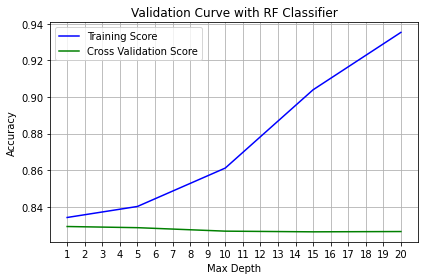

In [26]:
# Plot mean accuracy scores for training and testing scores
plt.plot(n_est, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(n_est, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RF Classifier")
plt.xlabel("Max Depth")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.grid()
plt.show()

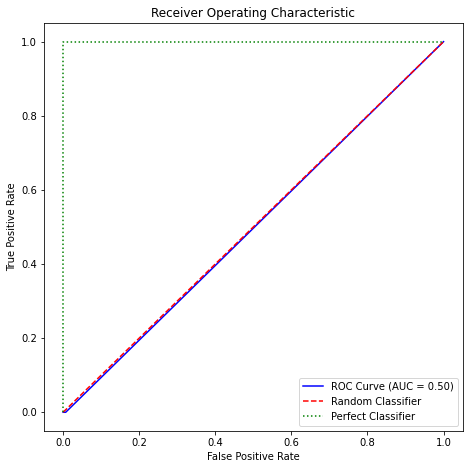

In [27]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(X_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1],linestyle='--', color='red',label='Random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
#plt.xlim([1,20])
#plt.ylim([1, 20])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

[0.02902375 0.29340369 1.         1.         1.         1.
 1.         1.         1.         1.        ]
Accuracy 83.22427440633244


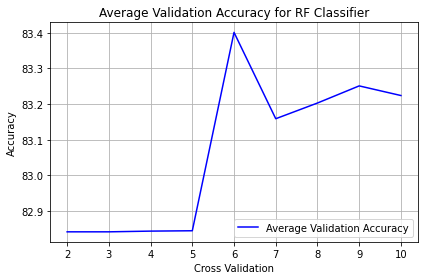

In [28]:
from sklearn.model_selection import RandomizedSearchCV,KFold,GridSearchCV
kfold = KFold(n_splits=10)
results = sklearn.model_selection.cross_val_score(clf,X_train,y_train,cv=kfold)
print(results)
print("Accuracy",results.mean()*100)
# Plot mean accuracy scores for training and testing scores
avg_acc = [82.842,82.842,82.844,82.845,83.401,83.159,83.203,83.251,83.224]
c_val = [2,3,4,5,6,7,8,9,10]
plt.plot(c_val, avg_acc,
     label = "Average Validation Accuracy", color = 'b')
#plt.plot(n_est, mean_test_score,
 #  label = "Cross Validation Score", color = 'g')
#Creating the plot
plt.title("Average Validation Accuracy for RF Classifier")
plt.xlabel("Cross Validation")
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [29]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [31]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190; total time=   2.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190; total time=   2.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=190; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=110; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=110; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=110; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=190; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_fe

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=2,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                               

In [33]:
print(rf_random.best_params_)

{'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [34]:
def Classification_Model():
    clf_r = RandomForestClassifier(n_estimators=20,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',max_depth=50,bootstrap=True)
    clf_r.fit(X_train,y_train)
    y_pred_r = clf_r.predict(X_test)
    print("Predicted values:")
    print(y_pred_r)
    #dd = df_train['visitors'].head(32019)
    print ('Accuracy:', accuracy_score(y_train, y_pred_r)*100)
    print ('F1 score:', f1_score(y_train, y_pred_r, average="weighted"))
    print ('Recall:', recall_score(y_train, y_pred_r, average="weighted"))
    print ('Precision:', precision_score(y_train, y_pred_r, average="weighted"))
    return y_pred_r,clf_r

In [35]:
y_pred_r,clf_r = Classification_Model()

Predicted values:
[  12.   12.   12. ... 9999. 9999. 9999.]
Accuracy: 95.09027557808045
F1 score: 0.9507106130097632
Recall: 0.9509027557808045
Precision: 0.951584420197832


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn import metrics
mse, bias, var = bias_variance_decomp(clf_r, X_train.values, y_train.values, X_test.values, y_pred_r, loss='mse', num_rounds=100)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(X_test,y_pred_r))

MSE from bias_variance lib [avg expected loss]: 2079.399
Avg Bias: 487.353
Avg Variance: 1592.046
Mean Square error by Sckit-learn lib: 30070271.574


In [37]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [39]:
base_model = RandomForestClassifier(n_estimators = 2)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_pred)

Model Performance
Average Error: 0.9364 degrees.
Accuracy = 91.34%.


In [40]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_pred_r)

Model Performance
Average Error: 0.7430 degrees.
Accuracy = 93.58%.


In [41]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.45%.


In [42]:
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_pred_r, clf_r)
#variance
var = np.var(y_pred_r)
SSE = np.mean((np.mean(y_pred_r) - y_train)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.

Bias = SSE - var
print("Training Error:",train_error)
print("Test Error:",test_error)
print("Variance:",var)
print("Bias:",Bias)

Training Error: 12.602787456445993
Test Error: 21.4392883539225
Variance: 14150497.8406109
Bias: -1442.2702256273478


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train,y_train)
y_pred_lr = model.predict(X_test)
print("Predicted values:")
print(y_pred_lr)
#dd = df_train['visitors'].head(32019)
print ('Accuracy:', accuracy_score(y_train, y_pred_lr)*100)

#print('Accuracy:', model.score(X_test, y_pred_lr)*100)
print ('F1 score:', f1_score(y_train, y_pred_lr, average="weighted"))
print ('Recall:', recall_score(y_train, y_pred_lr, average="weighted"))
print ('Precision:', precision_score(y_train, y_pred_lr, average="weighted"))

Predicted values:
[5.000e+00 9.999e+03 9.999e+03 ... 9.999e+03 9.999e+03 9.999e+03]
Accuracy: 82.84236089114138
F1 score: 0.7507073179359516
Recall: 0.8284236089114138
Precision: 0.6863219086129511


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_pred_lr, model)
#variance
var = np.var(y_pred_lr)
SSE = np.mean((np.mean(y_pred_lr) - y_train)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.

Bias = SSE - var
print("Training Error:",train_error)
print("Test Error:",test_error)
print("Variance:",var)
print("Bias:",Bias)

Training Error: 17074218.135994088
Test Error: 0.0
Variance: 5272.661971262578
Bias: 17072404.926485162


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [47]:
x_score = model.predict_proba(X_test)[:,1]
#fpr, tpr, threshold = roc_curve
(y_train, x_score)
y_train = y_train.astype(float)
xtth = pd.DataFrame(x_score)
n_est = [1,5,10,15,20]

In [48]:
#y_train
fpr, tpr, threshold = roc_curve(X_test, x_score,pos_label=1)
train_score, test_score = validation_curve(
    clf,
    X_train,
    y_train,
    param_name="max_depth",
    param_range=n_est, cv=5,
    scoring="accuracy",
    n_jobs=2,
)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [49]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

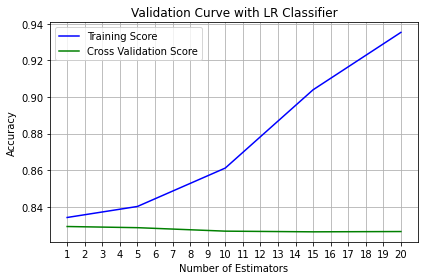

In [50]:
# Plot mean accuracy scores for training and testing scores
plt.plot(n_est, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(n_est, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with LR Classifier")
plt.xlabel("Number of Estimators")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.grid()
plt.show()

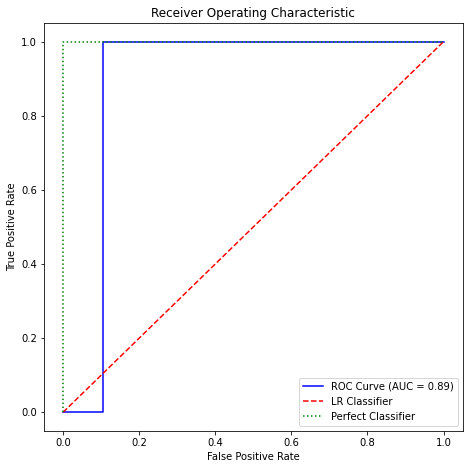

In [51]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(X_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1],linestyle='--', color='red',label='LR Classifier')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
#plt.xlim([1,20])
#plt.ylim([1, 20])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

[0.02902375 0.29340369 1.         1.         1.         1.
 1.         1.         1.         1.        ]
Accuracy 83.22427440633244


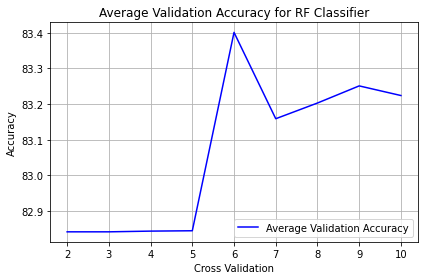

In [52]:
from sklearn.model_selection import RandomizedSearchCV,KFold,GridSearchCV
kfold = KFold(n_splits=10)
results = sklearn.model_selection.cross_val_score(clf,X_train,y_train,cv=kfold)
print(results)
print("Accuracy",results.mean()*100)
# Plot mean accuracy scores for training and testing scores
avg_acc = [82.842,82.842,82.844,82.845,83.401,83.159,83.203,83.251,83.224]
c_val = [2,3,4,5,6,7,8,9,10]
plt.plot(c_val, avg_acc,
     label = "Average Validation Accuracy", color = 'b')
#plt.plot(n_est, mean_test_score,
 #  label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Average Validation Accuracy for RF Classifier")
plt.xlabel("Cross Validation")
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [1]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
c = np.linspace(1,200)
penalty = ['l1','l2']
hyperparameters = dict(C=c,penalty=penalty)

# Create the random grid
random_grid = {'penalty': penalty,
                'C':c}
print(random_grid)

NameError: name 'np' is not defined

In [ ]:
rf_random = RandomizedSearchCV(clf_r, hyperparameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
print(rf_random.best_params_)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
clf = [
    #LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000),
    LogisticRegression(solver='sag',penalty='none',max_iter=1000),
    LogisticRegression(solver='saga',penalty='none',max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    #fp, tp, th = roc_curve(y_train, y_pred_lr)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_pred_lr), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_train, y_pred_lr,average="weighted"),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_train, y_pred_lr,average="weighted"),5)
    clf_compare.loc[row_index, 'F-1 Score'] = round(f1_score(y_train, y_pred_lr, average="weighted"),5)
  
    #clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
print(clf_compare)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the

   Train Accuracy  Test Accuracy  Precission   Recall  F-1 Score
2         0.83539        0.83127     0.68632  0.82842    0.75071
1         0.83545        0.83064     0.68632  0.82842    0.75071
0         0.83555        0.82890     0.68632  0.82842    0.75071


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
clf = [
    #LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    #fp, tp, th = roc_curve(y_train, y_pred_lr)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_pred_lr), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_train, y_pred_lr,average="weighted"),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_train, y_pred_lr,average="weighted"),5)
    clf_compare.loc[row_index, 'F-1 Score'] = round(f1_score(y_train, y_pred_lr, average="weighted"),5)
  
    #clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
print(clf_compare)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Train Accuracy  Test Accuracy  Precission   Recall  F-1 Score
0         0.83449         0.8648     0.68632  0.82842    0.75071
1         0.83449         0.8648     0.68632  0.82842    0.75071
2         0.83449         0.8648     0.68632  0.82842    0.75071


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
